In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [12]:
import numpy as np
import copy

from src.nqs import RBM, RandomHamiltonian, Hamiltonian
import src.utils as utils
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
visible_size = 4
hidden_size = 12
walker_steps = 5000

seed = 42  # Seed for random number generator


In [4]:
H = RandomHamiltonian(n=visible_size)
rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)

<IPython.core.display.Javascript object>


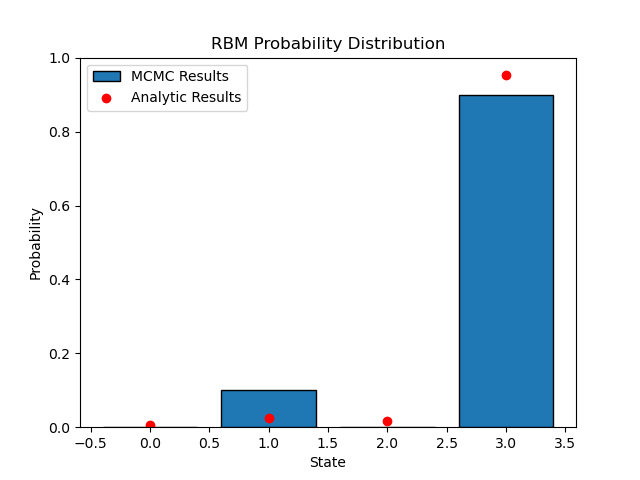

In [5]:

visible_size = 2
hidden_size = 12
walker_steps = 10

seed = 42  # Seed for random number generator

H = RandomHamiltonian(n=visible_size)
rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)
plt.figure(1)
plt.hist([utils.binary_array_to_int(state) for state in rbm.mcmc_dist()], density=True, bins=range(2**visible_size+1), edgecolor="black", align='left', rwidth = 0.8, label='MCMC')
plt.scatter([x for x in range(2**visible_size)], rbm.probability_dist(), color='red', label='Exact')
plt.title("RBM Probability Distribution")
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend(['MCMC Results', 'Analytic Results'])


<IPython.core.display.Javascript object>


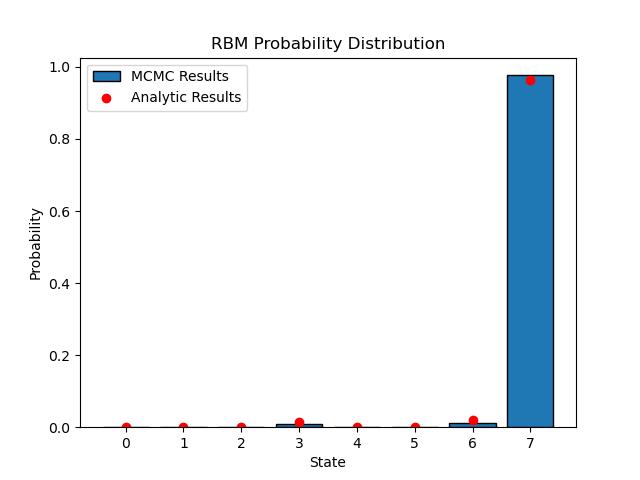

In [6]:

visible_size = 3
hidden_size = 12
walker_steps = 1000

seed = 42  # Seed for random number generator

H = RandomHamiltonian(n=visible_size)
rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)
plt.figure(2)
plt.hist([utils.binary_array_to_int(state) for state in rbm.mcmc_dist()], density=True, bins=range(2**visible_size+1), edgecolor="black", align='left', rwidth = 0.8, label='MCMC')
plt.scatter([x for x in range(2**visible_size)], rbm.probability_dist(), color='red', label='Exact')
plt.title("RBM Probability Distribution")
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend(['MCMC Results', 'Analytic Results'])


<IPython.core.display.Javascript object>


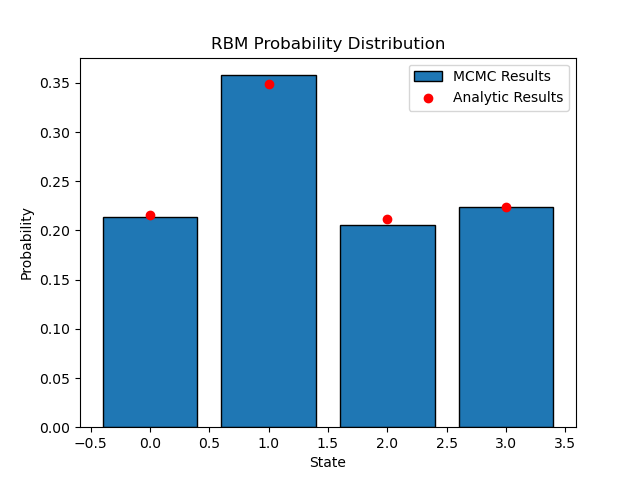

In [7]:

visible_size = 2
hidden_size = 4
walker_steps = 4000

seed = 42  # Seed for random number generator
np.random.seed(2040)
H = RandomHamiltonian(n=visible_size)
rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)
plt.figure(3)
plt.hist([utils.binary_array_to_int(state) for state in rbm.mcmc_dist()], density=True, bins=range(2**visible_size+1), edgecolor="black", align='left', rwidth = 0.8, label='MCMC')
plt.scatter([x for x in range(2**visible_size)], rbm.probability_dist(), color='red', label='Exact')
plt.title("RBM Probability Distribution")
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend(['MCMC Results', 'Analytic Results'])


In [32]:
seed = 42  # Seed for random number generator
visible_size = 4
hidden_size = 8
np.random.seed(2040)

hamiltonian = np.array([1, 0, 0, -1])
visible_size = int(np.sqrt(len(hamiltonian)))

H = Hamiltonian(values = hamiltonian)
rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)

eig, state = np.linalg.eigh(H)
#print(f"Eig: {eig},state: \n{state}")
E_truth = np.min(eig)
e_truth_index = np.where(eig == E_truth)
#print(f"Eig index: {e_truth_index}")
gstate = state[e_truth_index]
#print(f"g state: {gstate}")

#energy_list = rbm.train(iterations=100, lr=0.01, print_energy=False)

acc =[]


for i in range(1, 20):
    
    walker_steps = i*10

    rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)
    
    mcmc_wave_function = np.asarray([rbm.normalized_amplitude(dist) for dist in rbm.mcmc_dist()])
    print(mcmc_wave_function.shape)
    print(gstate.shape)
    acc.append((np.abs(gstate)**2 @ np.abs(mcmc_wave_function)**2)[0])
    print(acc[-1])

plt.figure(0)
plt.plot(acc)

(10, 1, 1)
(1, 4)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4)